# Pre-equilirbium reactions

Often there is an equilbrium between some chemical species:

$A + B \leftrightharpoons C$

The species $C$ can then react to form $D$:

$C \rightarrow D$

### First we load the packages that we need:

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Define a function that describes the reaction

In [7]:
def reaction(C,t):
	Ca = C[0]
	Cb = C[1]
	Cc = C[2]
	Cd = C[3] 
    
	k1fwd = 1.0 # rate constant for the forward reaction
	k1rev = 1.0 # rate constant for the reverse reaction
	k2 = 1.0 # rate constant for the formation of D
    
	dAdt = -k1fwd * Ca * Cb + k1rev * Cc 
	dBdt = -k1fwd * Ca * Cb + k1rev * Cc 
	dCdt =  k1rev * Ca * Cb - k1rev * Cc - k2 * Cc
	dDdt =  k2 * Cc

	return [dAdt,dBdt,dCdt,dDdt]

### Define our time-variable from 0 to 5s with 100 points

In [8]:
t = np.linspace(0.0005,10,100)

### Define our initial concentrations of 1 for A and B and 0 for C and D

In [9]:
C0 = [1,1,0,0]

### Integrate the differential equation i.e final concentration

In [10]:
C = odeint(reaction,C0,t)

### Plot the time-evolution

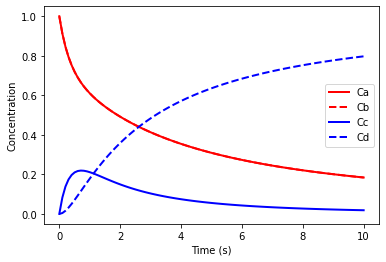

In [11]:
plt.plot(t,C[:,0],'r-',linewidth=2.0)
plt.plot(t,C[:,1],'r--',linewidth=2.0)
plt.plot(t,C[:,2],'b-',linewidth=2.0)
plt.plot(t,C[:,3],'b--',linewidth=2.0)
plt.xlabel('Time (s)')
plt.ylabel('Concentration')
plt.legend(['Ca','Cb','Cc','Cd'])